In [109]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
import numpy as np

In [110]:
# df = pd.read_csv('dataset.csv')
# df.shape

In [111]:
df = pd.read_csv('dataset2.csv')
df.shape

(43628, 18)

In [112]:
df['region'] = pd.Categorical(df['region'])
dfDummies = pd.get_dummies(df['region'], prefix = 'category')
df = pd.concat([df, dfDummies], axis=1)
df.shape

(43628, 479)

In [113]:
def cleanData():
    global df
    indexNames = df[ (df['price'] >= 250000000 )].index
    df.drop(indexNames , inplace=True)
    print(df.shape)
    indexNames = df[(df['price'] <= 10000)].index
    df.drop(indexNames , inplace=True)
    print(df.shape)
    indexNames = df[(df['area']>= 1000)].index
    df.drop(indexNames , inplace=True)
    print(df.shape)
    indexNames = df[(df['area'] <= 3 )].index
    df.drop(indexNames , inplace=True)
    print(df.shape)
    df.drop_duplicates(subset=['Lat','Lng'],keep='first',inplace = True)
    print(df.shape)

In [114]:
cleanData()
df.head()

(43591, 479)
(43591, 479)
(43590, 479)
(43587, 479)
(2158, 479)


,id,disc,region,cityID,area,price,Lat,Lng,bank,mosque,...,category_University Town,category_Valencia Housing Society,category_Valencia Housing Society Block A-1,"category_Valencia Housing Society,",category_Vital Homes Housing Scheme,category_Walton Road,category_Wapda Town,"category_Wapda Town,",category_Zaraj Housing Scheme,category_Zone-5
0,2,7 Marla Plot for Sale.,B-17,1,7.62400,2300000,33.669341,72.844890,1,1,...,0,0,0,0,0,0,0,0,0,0
16,41,5 Marla Residential Land for Sale in Islamabad...,Top City-1,1,5.44504,1000000,33.586108,72.866789,1,1,...,0,0,0,0,0,0,0,0,0,0
29,54,600 Square Yard Plot for Sale,F-16,1,21.60000,5500000,33.656936,72.888470,1,0,...,0,0,0,0,0,0,0,0,0,0
48,74,200 Square Yards Plot for Sale,Faisal Hills,1,7.20000,2185000,33.729388,73.093146,1,1,...,0,0,0,0,0,0,0,0,0,0
57,88,10 Marla Plot for Sale,Bahria Town,1,10.89200,9500000,33.692555,73.219032,1,1,...,0,0,0,0,0,0,0,0,0,0


NameError: name 'sns' is not defined

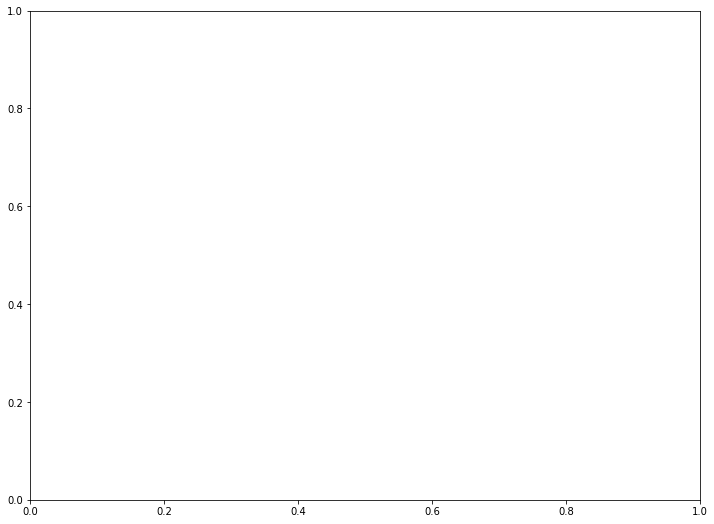

In [127]:
    corr_matrix = df.corr()
    plt.subplots(figsize=(12,9))
    sns.heatmap(corr_matrix, vmax=0.9, square=True)

In [115]:
X = df.drop(columns=['price','id','disc','region'])
Y = df[['price']]

In [116]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [117]:
X_scale

array([[0.        , 0.00558008, 0.99135876, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00278945, 0.98184766, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02347937, 0.98994124, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.05160391, 0.73929733, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.00976295, 0.73383047, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.00278945, 0.74342956, ..., 0.        , 0.        ,
        0.        ]])

In [118]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [119]:
X.head()

,cityID,area,Lat,Lng,bank,mosque,bus,park,department_store,school,...,category_University Town,category_Valencia Housing Society,category_Valencia Housing Society Block A-1,"category_Valencia Housing Society,",category_Vital Homes Housing Scheme,category_Walton Road,category_Wapda Town,"category_Wapda Town,",category_Zaraj Housing Scheme,category_Zone-5
0,1,7.62400,33.669341,72.844890,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,1,5.44504,33.586108,72.866789,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,21.60000,33.656936,72.888470,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48,1,7.20000,33.729388,73.093146,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
57,1,10.89200,33.692555,73.219032,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [120]:
Y.head()

,price
0,2300000
16,1000000
29,5500000
48,2185000
57,9500000


In [121]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [122]:
model = Sequential([
    Dense(475, activation='relu', input_shape=(475,)),
    Dense(500, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1),
])

In [123]:
model_2 = Sequential([
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(475,)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, kernel_regularizer=regularizers.l2(0.01)),
])

In [124]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])

In [125]:
model_2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])

In [98]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=1000,
          validation_data=(X_val, Y_val))

Train on 1510 samples, validate on 324 samples
Epoch 1/100
1510/1510 [==============================] - 1s 939us/step - loss: 786298705174430.3750 - mean_squared_error: 786298705174430.3750 - val_loss: 708849667485544.2500 - val_mean_squared_error: 708849667485544.2500
Epoch 2/100
1510/1510 [==============================] - 1s 336us/step - loss: 783949948038207.6250 - mean_squared_error: 783949948038207.6250 - val_loss: 702227461306797.8750 - val_mean_squared_error: 702227461306797.8750
Epoch 3/100
1510/1510 [==============================] - 0s 325us/step - loss: 766126315127022.7500 - mean_squared_error: 766126315127022.7500 - val_loss: 665932623310898.6250 - val_mean_squared_error: 665932623310898.6250
Epoch 4/100
1510/1510 [==============================] - 1s 420us/step - loss: 697908645588227.0000 - mean_squared_error: 697908645588227.0000 - val_loss: 568150849163213.3750 - val_mean_squared_error: 568150849163213.3750
Epoch 5/100
1510/1510 [==============================] - 1s 4

Epoch 74/100
1510/1510 [==============================] - 1s 359us/step - loss: 445059275644917.1250 - mean_squared_error: 445059275644917.1250 - val_loss: 336063804123818.6875 - val_mean_squared_error: 336063804123818.6875
Epoch 75/100
1510/1510 [==============================] - 1s 378us/step - loss: 443762970567795.2500 - mean_squared_error: 443762970567795.2500 - val_loss: 336204181446150.3125 - val_mean_squared_error: 336204181446150.3125
Epoch 76/100
1510/1510 [==============================] - 1s 339us/step - loss: 443769145227706.1875 - mean_squared_error: 443769145227706.1875 - val_loss: 335954275622608.5625 - val_mean_squared_error: 335954275622608.5625
Epoch 77/100
1510/1510 [==============================] - 1s 371us/step - loss: 443483911734181.1250 - mean_squared_error: 443483911734181.1250 - val_loss: 335731523516036.7500 - val_mean_squared_error: 335731523516036.7500
Epoch 78/100
1510/1510 [==============================] - 1s 359us/step - loss: 443513202067295.9375 - m

In [99]:
model.evaluate(X_test, Y_test)[1]

324/324 [==============================] - 0s 108us/step


413331988653953.56

In [126]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=1000,
          validation_data=(X_val, Y_val))

Train on 1510 samples, validate on 324 samples
Epoch 1/1000
1510/1510 [==============================] - 2s 1ms/step - loss: 792071633914867.8750 - mean_squared_error: 792071633914867.8750 - val_loss: 964191796171915.0000 - val_mean_squared_error: 964191796171915.0000
Epoch 2/1000
1510/1510 [==============================] - 0s 214us/step - loss: 791004689729918.5000 - mean_squared_error: 791004689729918.5000 - val_loss: 959425641800185.6250 - val_mean_squared_error: 959425641800185.6250
Epoch 3/1000
1510/1510 [==============================] - 0s 207us/step - loss: 768954144616160.3750 - mean_squared_error: 768954144616160.3750 - val_loss: 894542192755699.3750 - val_mean_squared_error: 894542192755699.3750
Epoch 4/1000
1510/1510 [==============================] - 0s 282us/step - loss: 631208914910798.0000 - mean_squared_error: 631208914910798.0000 - val_loss: 669194460675084.6250 - val_mean_squared_error: 669194460675084.6250
Epoch 5/1000
1510/1510 [==============================] - 0

1510/1510 [==============================] - 0s 170us/step - loss: 442337310438737.7500 - mean_squared_error: 442337310438737.7500 - val_loss: 511049117858221.8125 - val_mean_squared_error: 511049117858221.8125
Epoch 74/1000
1510/1510 [==============================] - 0s 189us/step - loss: 397341870113701.1250 - mean_squared_error: 397341870113701.1250 - val_loss: 506063393380882.9375 - val_mean_squared_error: 506063393380882.9375
Epoch 75/1000
1510/1510 [==============================] - 0s 175us/step - loss: 403982639928191.1250 - mean_squared_error: 403982639928191.1250 - val_loss: 502642820096303.4375 - val_mean_squared_error: 502642820096303.4375
Epoch 76/1000
1510/1510 [==============================] - 0s 180us/step - loss: 396350451222042.4375 - mean_squared_error: 396350451222042.4375 - val_loss: 499316592424378.5000 - val_mean_squared_error: 499316592424378.5000
Epoch 77/1000
1510/1510 [==============================] - 0s 240us/step - loss: 412688372248310.1875 - mean_squar

1510/1510 [==============================] - 1s 389us/step - loss: 390681027193572.5625 - mean_squared_error: 390681027193572.5625 - val_loss: 475059056425187.5625 - val_mean_squared_error: 475059056425187.5625
Epoch 146/1000
1510/1510 [==============================] - 1s 587us/step - loss: 394539665552634.9375 - mean_squared_error: 394539665552634.9375 - val_loss: 471900533364255.6875 - val_mean_squared_error: 471900533364255.6875
Epoch 147/1000
1510/1510 [==============================] - 1s 912us/step - loss: 379642097378723.0625 - mean_squared_error: 379642097378723.0625 - val_loss: 473390764086613.3125 - val_mean_squared_error: 473390764086613.3125
Epoch 148/1000
1510/1510 [==============================] - 1s 592us/step - loss: 386315067585830.3125 - mean_squared_error: 386315067585830.3125 - val_loss: 473132090277685.7500 - val_mean_squared_error: 473132090277685.7500
Epoch 149/1000
1510/1510 [==============================] - 1s 640us/step - loss: 397578983762942.6250 - mean_s

1510/1510 [==============================] - 0s 189us/step - loss: 360584071732586.1250 - mean_squared_error: 360584071732586.1250 - val_loss: 442526447963300.3125 - val_mean_squared_error: 442526447963300.3125
Epoch 218/1000
1510/1510 [==============================] - 0s 211us/step - loss: 365532280410638.2500 - mean_squared_error: 365532280410638.2500 - val_loss: 446225494812545.5625 - val_mean_squared_error: 446225494812545.5625
Epoch 219/1000
1510/1510 [==============================] - 0s 212us/step - loss: 346373843905881.8125 - mean_squared_error: 346373843905881.8125 - val_loss: 440600939414110.8125 - val_mean_squared_error: 440600939414110.8125
Epoch 220/1000
1510/1510 [==============================] - 0s 214us/step - loss: 365155447150958.1875 - mean_squared_error: 365155447150958.1875 - val_loss: 446965440978842.8125 - val_mean_squared_error: 446965440978842.8125
Epoch 221/1000
1510/1510 [==============================] - 0s 226us/step - loss: 379323602780876.1250 - mean_s

1510/1510 [==============================] - 1s 734us/step - loss: 308735403290466.6875 - mean_squared_error: 308735403290466.6875 - val_loss: 394778998064924.4375 - val_mean_squared_error: 394778998064924.4375
Epoch 290/1000
1510/1510 [==============================] - 1s 572us/step - loss: 311172160891143.1250 - mean_squared_error: 311172160891143.1250 - val_loss: 397205748518861.4375 - val_mean_squared_error: 397205748518861.4375
Epoch 291/1000
1510/1510 [==============================] - 1s 506us/step - loss: 292649588437811.1875 - mean_squared_error: 292649588437811.1875 - val_loss: 389567242907496.3125 - val_mean_squared_error: 389567242907496.3125
Epoch 292/1000
1510/1510 [==============================] - 1s 531us/step - loss: 302111407375421.0625 - mean_squared_error: 302111407375421.0625 - val_loss: 406454903786458.0625 - val_mean_squared_error: 406454903786458.0625
Epoch 293/1000
1510/1510 [==============================] - 1s 577us/step - loss: 306867351213599.8750 - mean_s

1510/1510 [==============================] - 1s 358us/step - loss: 252312818848378.7500 - mean_squared_error: 252312818848378.7500 - val_loss: 351964403545530.5000 - val_mean_squared_error: 351964403545530.5000
Epoch 362/1000
1510/1510 [==============================] - 1s 373us/step - loss: 254633559933817.7188 - mean_squared_error: 254633559933817.7188 - val_loss: 345498347265744.5625 - val_mean_squared_error: 345498347265744.5625
Epoch 363/1000
1510/1510 [==============================] - 0s 287us/step - loss: 246033029880282.6875 - mean_squared_error: 246033029880282.6875 - val_loss: 341617372842970.0625 - val_mean_squared_error: 341617372842970.0625
Epoch 364/1000
1510/1510 [==============================] - 0s 320us/step - loss: 258356050948936.9062 - mean_squared_error: 258356050948936.9062 - val_loss: 344347556828096.8125 - val_mean_squared_error: 344347556828096.8125
Epoch 365/1000
1510/1510 [==============================] - 0s 302us/step - loss: 260184852851189.8125 - mean_s

1510/1510 [==============================] - 1s 570us/step - loss: 237229316207346.1250 - mean_squared_error: 237229316207346.1250 - val_loss: 339122359495945.5000 - val_mean_squared_error: 339122359495945.5000
Epoch 434/1000
1510/1510 [==============================] - 1s 442us/step - loss: 224747972319923.7188 - mean_squared_error: 224747972319923.7188 - val_loss: 345970226116835.5625 - val_mean_squared_error: 345970226116835.5625
Epoch 435/1000
1510/1510 [==============================] - 1s 880us/step - loss: 233136495842544.0938 - mean_squared_error: 233136495842544.0938 - val_loss: 335872186258166.5000 - val_mean_squared_error: 335872186258166.5000
Epoch 436/1000
1510/1510 [==============================] - 1s 779us/step - loss: 224353245340309.8750 - mean_squared_error: 224353245340309.8750 - val_loss: 332296019001141.7500 - val_mean_squared_error: 332296019001141.7500
Epoch 437/1000
1510/1510 [==============================] - 1s 570us/step - loss: 237558523589535.7188 - mean_s

1510/1510 [==============================] - 0s 203us/step - loss: 209752147536438.9375 - mean_squared_error: 209752147536438.9375 - val_loss: 350913943733437.6250 - val_mean_squared_error: 350913943733437.6250
Epoch 506/1000
1510/1510 [==============================] - 1s 624us/step - loss: 217852444155697.8438 - mean_squared_error: 217852444155697.8438 - val_loss: 346360986351843.5625 - val_mean_squared_error: 346360986351843.5625
Epoch 507/1000
1510/1510 [==============================] - 1s 623us/step - loss: 222459693235356.0000 - mean_squared_error: 222459693235356.0000 - val_loss: 357941973032049.7500 - val_mean_squared_error: 357941973032049.7500
Epoch 508/1000
1510/1510 [==============================] - 0s 205us/step - loss: 203703171265721.7812 - mean_squared_error: 203703171265721.7812 - val_loss: 345404965734577.0000 - val_mean_squared_error: 345404965734577.0000
Epoch 509/1000
1510/1510 [==============================] - 0s 188us/step - loss: 204619995521816.0625 - mean_s

1510/1510 [==============================] - 1s 374us/step - loss: 200546687525873.0938 - mean_squared_error: 200546687525873.0938 - val_loss: 347592229805776.5625 - val_mean_squared_error: 347592229805776.5625
Epoch 578/1000
1510/1510 [==============================] - 0s 316us/step - loss: 210587003338600.0938 - mean_squared_error: 210587003338600.0938 - val_loss: 369722940437541.9375 - val_mean_squared_error: 369722940437541.9375
Epoch 579/1000
1510/1510 [==============================] - 1s 334us/step - loss: 184526953928571.0938 - mean_squared_error: 184526953928571.0938 - val_loss: 355772427578026.6875 - val_mean_squared_error: 355772427578026.6875
Epoch 580/1000
1510/1510 [==============================] - 1s 342us/step - loss: 172533067916403.2812 - mean_squared_error: 172533067916403.2812 - val_loss: 336371473073543.8750 - val_mean_squared_error: 336371473073543.8750
Epoch 581/1000
1510/1510 [==============================] - 1s 369us/step - loss: 215823777834706.9062 - mean_s

1510/1510 [==============================] - 0s 277us/step - loss: 184871224106389.5312 - mean_squared_error: 184871224106389.5312 - val_loss: 340752641420553.5000 - val_mean_squared_error: 340752641420553.5000
Epoch 650/1000
1510/1510 [==============================] - 0s 214us/step - loss: 192386353271114.9375 - mean_squared_error: 192386353271114.9375 - val_loss: 351985296461166.6250 - val_mean_squared_error: 351985296461166.6250
Epoch 651/1000
1510/1510 [==============================] - 0s 280us/step - loss: 189314987531127.0000 - mean_squared_error: 189314987531127.0000 - val_loss: 377288196562033.7500 - val_mean_squared_error: 377288196562033.7500
Epoch 652/1000
1510/1510 [==============================] - 0s 318us/step - loss: 192925997593026.2812 - mean_squared_error: 192925997593026.2812 - val_loss: 346838931797636.7500 - val_mean_squared_error: 346838931797636.7500
Epoch 653/1000
1510/1510 [==============================] - 1s 350us/step - loss: 178927790875220.7812 - mean_s

1510/1510 [==============================] - 1s 690us/step - loss: 204139082158324.1250 - mean_squared_error: 204139082158324.1250 - val_loss: 351760482388145.0000 - val_mean_squared_error: 351760482388145.0000
Epoch 722/1000
1510/1510 [==============================] - 1s 615us/step - loss: 180599642610659.5312 - mean_squared_error: 180599642610659.5312 - val_loss: 345748537732361.5000 - val_mean_squared_error: 345748537732361.5000
Epoch 723/1000
1510/1510 [==============================] - 2s 1ms/step - loss: 173219504920247.7812 - mean_squared_error: 173219504920247.7812 - val_loss: 350160378843287.6875 - val_mean_squared_error: 350160378843287.6875
Epoch 724/1000
1510/1510 [==============================] - 1s 737us/step - loss: 168932194940068.1250 - mean_squared_error: 168932194940068.1250 - val_loss: 339211509582810.0625 - val_mean_squared_error: 339211509582810.0625
Epoch 725/1000
1510/1510 [==============================] - 1s 761us/step - loss: 181838274435611.8125 - mean_squ

1510/1510 [==============================] - 0s 279us/step - loss: 179283579789561.5625 - mean_squared_error: 179283579789561.5625 - val_loss: 373657328195508.1250 - val_mean_squared_error: 373657328195508.1250
Epoch 794/1000
1510/1510 [==============================] - 0s 238us/step - loss: 184420029277646.5000 - mean_squared_error: 184420029277646.5000 - val_loss: 358814140411752.3125 - val_mean_squared_error: 358814140411752.3125
Epoch 795/1000
1510/1510 [==============================] - 0s 282us/step - loss: 176182296247191.5625 - mean_squared_error: 176182296247191.5625 - val_loss: 358744383543826.9375 - val_mean_squared_error: 358744383543826.9375
Epoch 796/1000
1510/1510 [==============================] - 0s 243us/step - loss: 172409153154524.0625 - mean_squared_error: 172409153154524.0625 - val_loss: 375640654966430.0000 - val_mean_squared_error: 375640654966430.0000
Epoch 797/1000
1510/1510 [==============================] - 0s 306us/step - loss: 170304292018216.6875 - mean_s

1510/1510 [==============================] - 1s 523us/step - loss: 172042799799484.5312 - mean_squared_error: 172042799799484.5312 - val_loss: 347981857734049.1875 - val_mean_squared_error: 347981857734049.1875
Epoch 866/1000
1510/1510 [==============================] - 1s 488us/step - loss: 179301883044740.5938 - mean_squared_error: 179301883044740.5938 - val_loss: 361659045692403.3750 - val_mean_squared_error: 361659045692403.3750
Epoch 867/1000
1510/1510 [==============================] - 1s 396us/step - loss: 170160651566843.5938 - mean_squared_error: 170160651566843.5938 - val_loss: 350535143297378.0000 - val_mean_squared_error: 350535143297378.0000
Epoch 868/1000
1510/1510 [==============================] - 1s 488us/step - loss: 154665168020812.2812 - mean_squared_error: 154665168020812.2812 - val_loss: 352814707325964.6250 - val_mean_squared_error: 352814707325964.6250
Epoch 869/1000
1510/1510 [==============================] - 1s 473us/step - loss: 192054176282805.7500 - mean_s

1510/1510 [==============================] - 1s 708us/step - loss: 175307144439463.5000 - mean_squared_error: 175307144439463.5000 - val_loss: 358981935743987.3750 - val_mean_squared_error: 358981935743987.3750
Epoch 938/1000
1510/1510 [==============================] - 1s 618us/step - loss: 174869587234626.1250 - mean_squared_error: 174869587234626.1250 - val_loss: 373118786888994.7500 - val_mean_squared_error: 373118786888994.7500
Epoch 939/1000
1510/1510 [==============================] - 1s 554us/step - loss: 175129540485760.1562 - mean_squared_error: 175129540485760.1562 - val_loss: 380610284281148.0625 - val_mean_squared_error: 380610284281148.0625
Epoch 940/1000
1510/1510 [==============================] - 1s 680us/step - loss: 167458599366108.0625 - mean_squared_error: 167458599366108.0625 - val_loss: 344306047018274.7500 - val_mean_squared_error: 344306047018274.7500
Epoch 941/1000
1510/1510 [==============================] - 1s 581us/step - loss: 157651464127375.4375 - mean_s

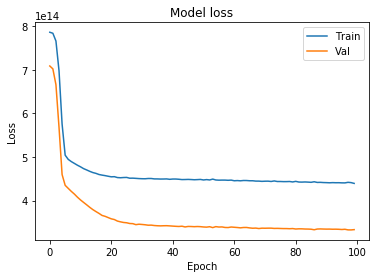

In [100]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

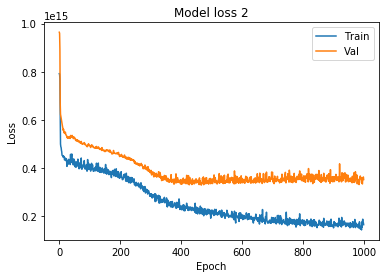

In [128]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [24]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

In [25]:
#test_data = np.array([1,7.624,33.669341,72.84489,1,1,0,0,0,1,1,1,1,1])
test_data = np.array([1	,43.560,	33.669341,	72.84489,	1,	1,	0,	0,	0,	1,	1,	1,	1,	1])
print(model.predict(test_data.reshape(1,14), batch_size=1))
prediction = model.predict(test_data.reshape(1,14), batch_size=1)
print(Y.at[1,"price"])
print(prediction - Y.at[1,"price"])

ValueError: Error when checking input: expected dense_1_input to have shape (475,) but got array with shape (14,)

In [28]:
#test_data = np.array([1,7.624,33.669341,72.84489,1,1,0,0,0,1,1,1,1,1])
test_data = np.array([1	,43.560,	33.669341,	72.84489,	1,	1,	0,	0,	0,	1,	1,	1,	1,	1])
print(model_2.predict(test_data.reshape(1,14), batch_size=1))
prediction = model_2.predict(test_data.reshape(1,14), batch_size=1)
print(Y.at[1,"price"])
print(prediction - Y.at[1,"price"])

ValueError: Error when checking input: expected dense_5_input to have shape (475,) but got array with shape (14,)

In [108]:
pred_train= model.predict(X_train)
print(Y_train)
print("break")
print(pred_train)
print("Train set = ",np.sqrt(mean_squared_error(Y_train,pred_train)))

pred= model.predict(X_test)
print("Test set = ",np.sqrt(mean_squared_error(Y_test,pred)))

          price
5138   34500000
944    65000000
3772   16000000
24948  10000000
23427   2950000
...         ...
38603   6400000
25043  21000000
33952  37500000
34821   8100000
1105    2500000

[1510 rows x 1 columns]
break
[[44714130.]
 [11634142.]
 [ 9960718.]
 ...
 [25521498.]
 [11666636.]
 [11350182.]]
Train set =  20953648.756508537
Test set =  20330567.994269352


In [129]:
pred_train= model_2.predict(X_train)
print(Y_train)
print("break")
print(pred_train)
print("Train set = ",np.sqrt(mean_squared_error(Y_train,pred_train)))

pred= model_2.predict(X_test)
print("Test set = ",np.sqrt(mean_squared_error(Y_test,pred)))

           price
37263    6900000
26931   16500000
27456   64000000
745      4200000
2745    14000000
...          ...
992    110000000
31541   75000000
35668    8900000
20450    6000000
5351     4600000

[1510 rows x 1 columns]
break
[[13377567. ]
 [12844861. ]
 [10353946. ]
 ...
 [ 8439242. ]
 [ 3090338.8]
 [ 4218401.5]]
Train set =  11682826.663302323
Test set =  14290469.961257357
